In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sparsetools as sp
from scipy.ndimage import median_filter

In [2]:
rf_syn = sp.profile('band_6_many_RF_syn_both.nc')

profile::setsize: nx=61, ny=100, nw=2, ns=4, nt=2
profile::read: [profiles][wav]


In [3]:
rf_mod = sp.model('band_6_many_RF_mod_new.nc')

model::read: atmos type -> depth-stratified
model::read: nx=61, ny=100, ndep=61, nt=2
model::setSize: nx = 61, ny = 100, ndep = 61, nt = 2


In [4]:
ref_hot_6 = np.nanmedian(rf_syn.dat[0,:,:,0,0],1)
rf_hot_6 = (rf_syn.dat[0,:,:,0,0].T - ref_hot_6) / (100. * ref_hot_6)
rf_hot_6 /= np.nanmax(rf_hot_6.T,1)
rf_hot_6 = np.where(np.abs(rf_hot_6)>30,0,rf_hot_6)
ref_cool_6 = np.nanmedian(rf_syn.dat[1,:,:,0,0],1)
rf_cool_6 = (rf_syn.dat[1,:,:,0,0].T - ref_cool_6) / (100. * ref_cool_6)
rf_cool_6 /= np.nanmax(rf_cool_6.T,1)
rf_cool_6 = np.where(np.abs(rf_cool_6)>30,0,rf_cool_6)
ref_hot_3 = np.nanmedian(rf_syn.dat[0,:,:,1,0],1)
rf_hot_3 = (rf_syn.dat[0,:,:,1,0].T - ref_hot_3) / (100. * ref_hot_3)
rf_hot_3 /= np.nanmax(rf_hot_3.T,1)
rf_hot_3 = np.where(np.abs(rf_hot_3)>30,0,rf_hot_3)
ref_cool_3 = np.nanmedian(rf_syn.dat[1,:,:,1,0],1)
rf_cool_3 = (rf_syn.dat[1,:,:,1,0].T - ref_cool_3) / (100. * ref_cool_3)
rf_cool_3 /= np.nanmax(rf_cool_3.T,1)
rf_cool_3 = np.where(np.abs(rf_cool_3)>30,0,rf_cool_3)

In [5]:
ind_hot_6 = np.argsort(ref_hot_6)
ind_cool_6 = np.argsort(ref_cool_6)
ind_hot_3 = np.argsort(ref_hot_3)
ind_cool_3 = np.argsort(ref_cool_3)

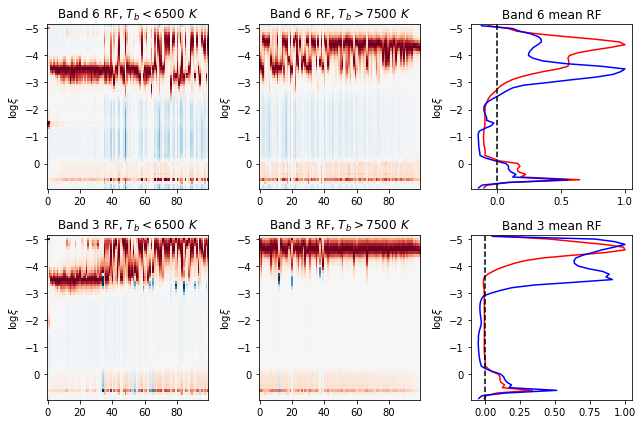

In [12]:
plt.figure(figsize=(9,6))
plt.subplot(232)
plt.imshow(rf_hot_6[:,ind_hot_6],cmap='RdBu_r',extent=[-0.5,99.5,0.95,-5.15],aspect='auto',vmin=-1,vmax=1)
plt.ylabel(r'$\log\xi$')
plt.title(r'Band 6 RF, $T_b > 7500\ K$')
plt.subplot(231)
plt.imshow(rf_cool_6[:,ind_cool_6],cmap='RdBu_r',extent=[-0.5,99.5,0.95,-5.15],aspect='auto',vmin=-1,vmax=1)
plt.ylabel(r'$\log\xi$')
plt.title(r'Band 6 RF, $T_b < 6500\ K$')
plt.subplot(233)
rf_mean_hot_6 = np.nanmean(rf_hot_6,1)/np.max(np.nanmean(rf_hot_6,1))
plt.plot(rf_mean_hot_6,np.arange(61)*0.1-5.1,'-r')
rf_mean_cool_6 = np.nanmean(rf_cool_6,1)/np.max(np.nanmean(rf_cool_6,1))
plt.plot(rf_mean_cool_6,np.arange(61)*0.1-5.1,'-b')
plt.axvline(0,color='k',linestyle='--')
plt.ylabel(r'$\log\xi$')
plt.title('Band 6 mean RF')
plt.ylim(0.95,-5.15)
plt.subplot(235)
plt.imshow(rf_hot_3[:,ind_hot_6],cmap='RdBu_r',extent=[-0.5,99.5,0.95,-5.15],aspect='auto',vmin=-1,vmax=1)
plt.ylabel(r'$\log\xi$')
plt.title(r'Band 3 RF, $T_b > 7500\ K$')
plt.subplot(234)
plt.imshow(rf_cool_3[:,ind_cool_6],cmap='RdBu_r',extent=[-0.5,99.5,0.95,-5.15],aspect='auto',vmin=-1,vmax=1)
plt.ylabel(r'$\log\xi$')
plt.title(r'Band 3 RF, $T_b < 6500\ K$')
plt.subplot(236)
rf_mean_hot_3 = np.nanmean(rf_hot_3,1)/np.max(np.nanmean(rf_hot_3,1))
plt.plot(rf_mean_hot_3,np.arange(61)*0.1-5.1,'-r')
rf_mean_cool_3 = np.nanmean(rf_cool_3,1)/np.max(np.nanmean(rf_cool_3,1))
plt.plot(rf_mean_cool_3,np.arange(61)*0.1-5.1,'-b')
plt.axvline(0,color='k',linestyle='--')
plt.ylabel(r'$\log\xi$')
plt.title('Band 3 mean RF')
plt.ylim(0.95,-5.15)
plt.tight_layout()
plt.savefig('band_6_many_rf_plots_both.png')

NameError: name 'LogNorm' is not defined

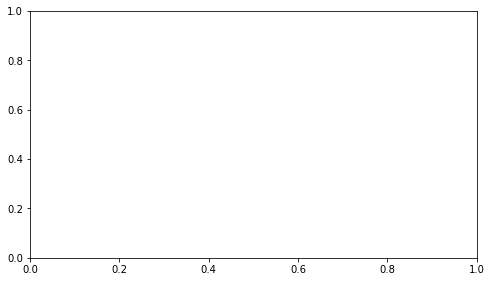

In [10]:
plt.figure(figsize=(8,10))
plt.subplot(211)
plt.imshow(rf_mod.temp[1,ind_cool_6,0].T,extent=[-0.5,99.5,0.95,-5.15],aspect='auto',\
           cmap='magma',vmin=3100,vmax=10000,norm=LogNorm())
for i in range(4):
    plt.axvline(20*(i+1),linestyle='--',color='k')
plt.colorbar()
plt.subplot(212)
plt.imshow(rf_cool_6[:,ind_cool_6],extent=[-0.5,99.5,0.95,-5.15],aspect='auto',\
           cmap='gist_yarg',vmin=0,vmax=1)
for i in range(4):
    plt.axvline(20*(i+1),linestyle='--',color='k')
plt.colorbar()

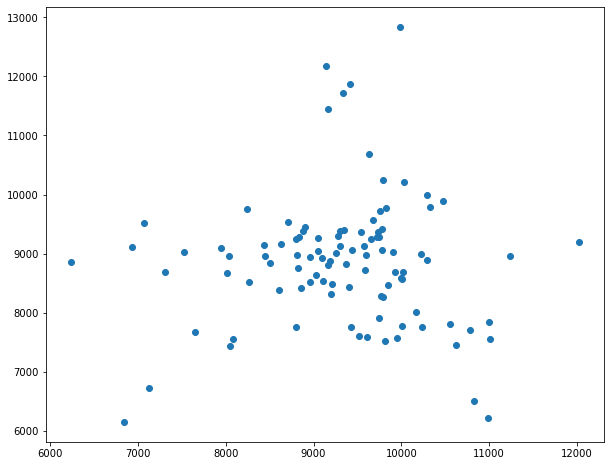

In [186]:
plt.figure(figsize=(10,8))
plt.scatter(np.max(rf_hot_3*rf_mod.temp[0,:,0].T,axis=0).ravel(),ref_hot_3.ravel()*7300)

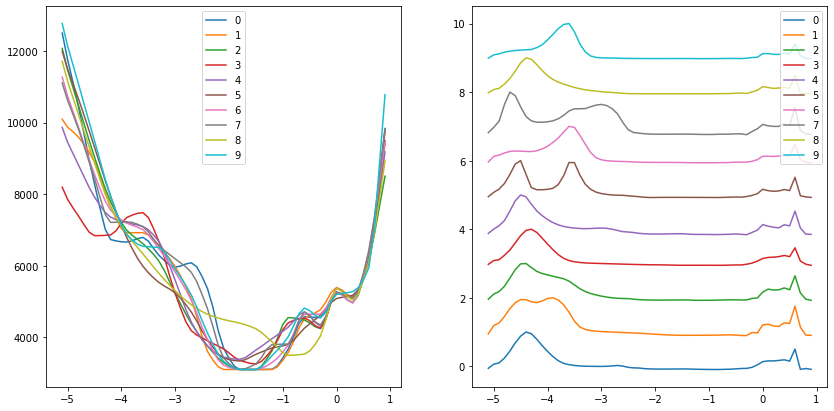

In [110]:
plt.figure(figsize=(14,7))
plt.subplot(121)
for i in range(10):
    plt.plot(rf_mod.cmass[0,0,0],rf_mod.temp[0,ind_cool_6[0+i],0,:],label=str(i))
plt.legend()
plt.subplot(122)
for i in range(10):
    plt.plot(rf_mod.cmass[0,0,0],rf_hot_6[:,ind_cool_6[0+i]]+i,label=str(i))
plt.legend()

Text(0.5, 1.0, 'Sorted $T_b$')

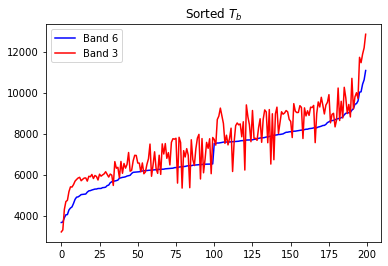

In [11]:
plt.plot(np.concatenate((ref_cool_6[ind_cool_6],ref_hot_6[ind_hot_6]))*5900,'-b',label='Band 6')
plt.plot(np.concatenate((ref_cool_3[ind_cool_6],ref_hot_3[ind_hot_6]))*7300,'-r',label='Band 3')
plt.legend()
plt.title(r'Sorted $T_b$')

Text(0.5, 1.0, '$T_b$ vs. $T_{mod}$ correlation')

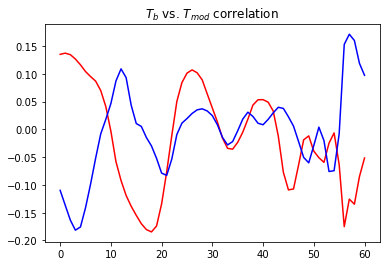

In [82]:
corr_hot_3 = np.zeros(61)
corr_cool_3 = np.zeros(61)
for i in range(61):
    corr_hot_3[i] = np.corrcoef(ref_hot_3.ravel(),np.median(rf_mod.temp[0,:,:,i],1).ravel())[0,1]
plt.plot(corr_hot_3,'-r')
for i in range(61):
    corr_cool_3[i] = np.corrcoef(ref_cool_3.ravel(),np.median(rf_mod.temp[1,:,:,i],1).ravel())[0,1]
plt.plot(corr_cool_3,'-b')
plt.title(r'$T_b$ vs. $T_{mod}$ correlation')

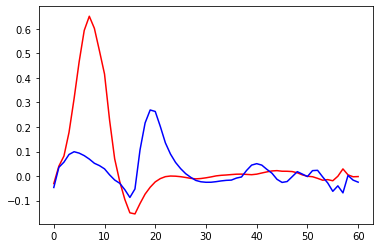

In [13]:
plt.plot(rf_mean_hot*corr_hot,'-r')
plt.plot(rf_mean_cool*corr_cool,'-b')